# US Baby Names 1880 - 2010

## Agenda:

1. Visualize the proportion of babies given a particular name over time
2. Determine the relative rank of a name
3. Determine the most popular names in each year or the names whose popularity has advanced or declined the most
4. Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
5. Analyze external souces of trends: biblical names, celebrities, demographic changes

## 1. Load the data files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
names1880 = pd.read_csv('yob1880.txt', names = ['name','sex','birth'])
names1880.head(10)

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In order to protect the privacy, the file only contains names with at least five occurrences in each year. So, we would like to investigate the total number of births in 1880


In [3]:
names1880.groupby('sex').sum()

,birth
sex,
F,90993
M,110493


Since the dataset is split into multiple files by year. Firstly, we would like to assemble all of the data into a single DataFrame and further add a year field. 

In [4]:
years = range(1880,2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    file_name = 'yob'+ str(year) + '.txt'
    
    df = pd.read_csv(file_name, names = columns)
    
    df['year'] = year
    
    pieces.append(df)
    
names = pd.concat(pieces, ignore_index = True)

names.head(10)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


With the combined dataset, we would like to start aggregating data at the year and sex level using the __pivot_table__ method

In [5]:
total_births = names.pivot_table('births', index = 'year', columns = 'sex',
                                aggfunc = sum)
total_births.tail(10)

sex,F,M
year,,
2001,1798284,1940498
2002,1794358,1938941
2003,1824406,1972439
2004,1833005,1981557
2005,1843890,1993285
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359


Let's plot a line chart and see some basic visulizations

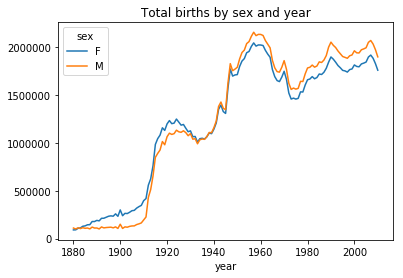

In [6]:
total_births.plot(title = 'Total births by sex and year')
plt.show()

Then we would like to investigate the proportion of each name for the whole dataset

In [7]:
def add_group(group):
    group['prop'] = group['births'] / group['births'].sum()
    
    return group

names = names.groupby(['year','sex']).apply(add_group)

In [8]:
names.head(10)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


Sanity check for adding all the proportions and expect the sum will be $1$

In [9]:
names.groupby(['year','sex']).prop.sum()[0:10]

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
Name: prop, dtype: float64

After the sanity check, we extract a subset of the data to facilitate further analysis. We extracted the top $1000$ names for each sex and year combined. 

In [10]:
def top1000(group):
    return group.sort_values(by = 'births', ascending = False)[0:1000]

group_top1000 = names.groupby(['year', 'sex']).apply(top1000)
group_top1000.reset_index(inplace = True, drop = True)
group_top1000[0:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


Analyzing Naming Trends

In [11]:
# Split the dataset into boys and girls protions

boys = group_top1000[group_top1000.sex == 'M']
girls = group_top1000[group_top1000.sex == 'F']
total_births = group_top1000.pivot_table('births', index = 'year', columns = 'sex',
                                        aggfunc = sum)

total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Data columns (total 2 columns):
F    131 non-null int64
M    131 non-null int64
dtypes: int64(2)
memory usage: 3.1 KB


We can plot with some example name trends

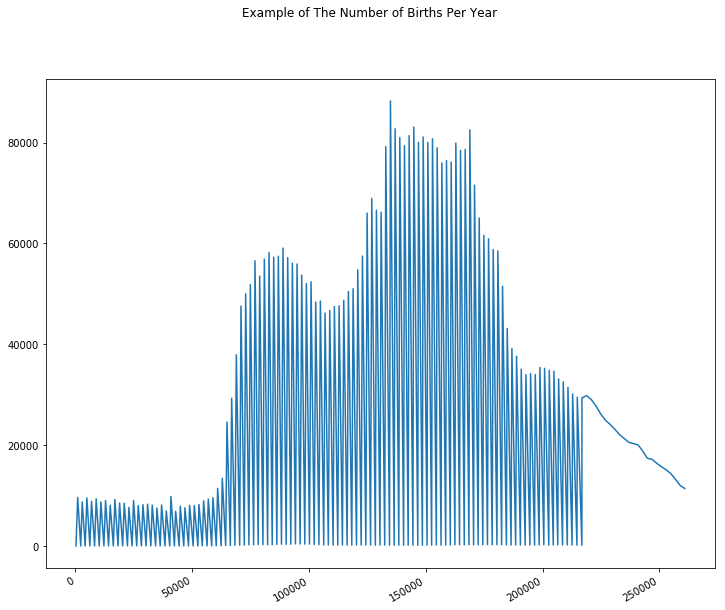

In [12]:
subset = group_top1000[group_top1000['name']=='John']['births']

subset.plot(subplots = True, figsize = (12,10), grid = False, 
           title = 'Example of The Number of Births Per Year')
plt.show()

Measuring the increase in nameing diversity

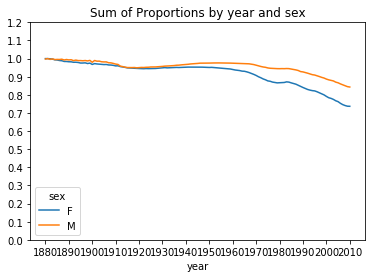

In [13]:
import numpy as np
table = group_top1000.pivot_table('prop', index = 'year', columns = 'sex', 
                                  aggfunc = sum)

table.plot(title = 'Sum of Proportions by year and sex',
          yticks = np.linspace(0,1.2,13),
          xticks = range(1880, 2020, 10))
plt.show()

We can see from the graph above that there appears to be increasing name diversity because of the decreasing total proportion in the top 1000 names. Then, we are going to explore how many of the most popular names it takes to reach $50$ %

In [14]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values('prop', ascending = False)
    
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = group_top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')


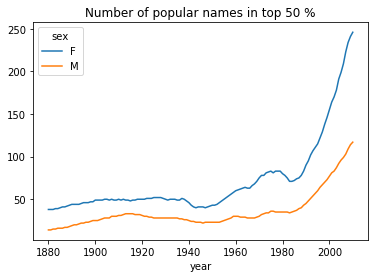

In [15]:
diversity.plot(title = 'Number of popular names in top 50 %'
              )

plt.show()

As we can see, girls names have always been more diverse than boy names, and they have only become more so over time. 

Explore The Last Letter Revolution

In [16]:
get_last_letter = lambda x: x[-1]

last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index = last_letters, columns =
                         ['sex', 'year'], aggfunc= sum)

subtable = table.reindex(columns=[1910, 1960, 2010], level = 'year')
subtable.head(10)

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0

In [17]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [18]:
letter_prop = subtable / subtable.sum()


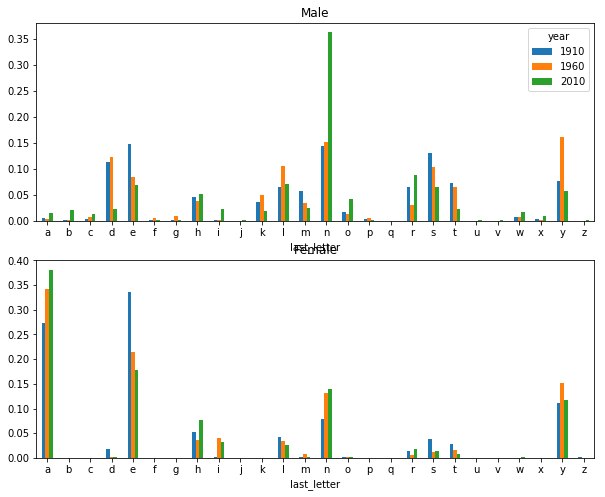

In [19]:
fig, axes = plt.subplots(2,1, figsize = (10,8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax= axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax= axes[1], title = 'Female',
                     legend = False)
plt.show()

As we can see, boy names ending in n have experienced significant growth since the 1960s. Then, we would like to make a time series plot.

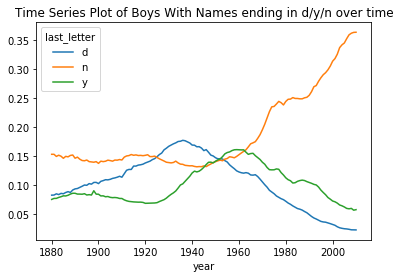

In [20]:
letter_prop = table / table.sum()
ts = letter_prop.loc[['d','n','y'], 'M'].T
ts.plot(title = 'Time Series Plot of Boys With Names ending in d/y/n over time')
plt.show()

Boy Names Becomes Girl Names. Use Name 'leslie' like as an example

In [21]:
all_names = pd.Series(group_top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
name_filtered = group_top1000[group_top1000.name.isin(lesley_like)]
name_filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

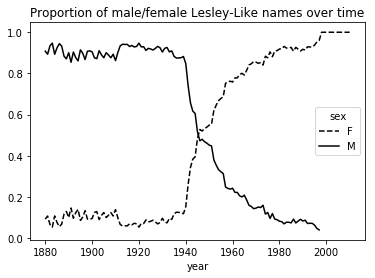

In [22]:
table = name_filtered.pivot_table('births', index = 'year', 
                                 columns = 'sex', aggfunc = sum)
table = table.div(table.sum(1),axis = 0)
table.plot(style = {'M':'k-', 'F':'k--'}, title = 'Proportion of male/female Lesley-Like names over time')
plt.show()